<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather 
# than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have 
# one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
# check the iowa file location for your computer 
iowa_file = '/Users/manuel/Desktop/dsi-sf-7-materials_manuel/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file, na_filter=False)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.describe()

,Store Number,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [4]:
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number             object
County                    object
Category                  object
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [5]:
# iowa_clean = iowa[:1000]
iowa_clean = iowa

In [6]:
# iowa_clean = iowa_clean.copy()

In [7]:
iowa_clean

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


### 3.2 Clean the columns

In [8]:
iowa_clean['State Bottle Cost'] = iowa_clean['State Bottle Cost'].str.replace('$', "")
iowa_clean['State Bottle Retail'] = iowa_clean['State Bottle Retail'].str.replace('$', "")
iowa_clean['Sale (Dollars)'] = iowa_clean['Sale (Dollars)'].str.replace('$', "")


In [9]:
iowa_clean.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [10]:
iowa_clean.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number             object
County                    object
Category                  object
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [11]:
iowa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            270955 non-null object
County                   270955 non-null object
Category                 270955 non-null object
Category Name            270955 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(2), int64(5)

In [12]:
for i, ele in enumerate(iowa_clean["Volume Sold (Gallons)"]):
    if type(ele) != np.float64:
        print i, ele

In [13]:
for i, ele in enumerate(iowa_clean["Volume Sold (Liters)"]):
    if type(ele) != np.float64:
        print i, ele

In [14]:
for i, ele in enumerate(iowa_clean["Sale (Dollars)"]):
    if type(ele) != str:
        print i, ele

In [15]:
for i, ele in enumerate(iowa_clean["Bottles Sold"]):
    if type(ele) != np.int64:
        print i, ele

In [16]:
for i, ele in enumerate(iowa_clean["State Bottle Retail"]):
    if type(ele) != str:
        print i, ele

In [17]:
for i, ele in enumerate(iowa_clean["State Bottle Cost"]):
    if type(ele) != str:
        print i, ele

In [18]:
for i, ele in enumerate(iowa_clean["Bottle Volume (ml)"]):
    if type(ele) != np.int64:
        print i, ele

In [19]:
for i, ele in enumerate(iowa_clean["Item Description"]):
    if type(ele) != str:
        print i, ele

In [20]:
for i, ele in enumerate(iowa_clean["Item Number"]):
    if type(ele) != np.int64:
        print i, ele

In [21]:
for i, ele in enumerate(iowa_clean["Vendor Number"]):
    if type(ele) != np.int64:
        print i, ele

In [22]:
for i, ele in enumerate(iowa_clean["Category Name"]):
    if type(ele) != str:
        iowa_clean['Category Name'][i] = ''
        print i, ele
        # nan = str FOUND REPEATED IN MANY CELLS, gonna change to:

In [23]:
for i, ele in enumerate(iowa_clean["Category"]):
    #if type(ele) != np.float64:
    if type(ele) != str:
        iowa_clean['Category'][i] = ''
        print i, ele

In [24]:
for i, ele in enumerate(iowa_clean["County"]):
    if type(ele) != str:
        iowa_clean['County'][i] = ''
        print i, ele
        # nan = str FOUND REPEATED IN MANY CELLS, gonna change to ''


In [25]:
for i, ele in enumerate(iowa_clean["County Number"]):
    #if type(ele) != np.float64:
    if type(ele) != str:
        iowa_clean['County Number'][i] = ''
        print i, ele

In [26]:
for i, ele in enumerate(iowa_clean["Zip Code"]):
    try:
        if type(np.int64(ele)) != np.int64:
            print i, ele
    except ValueError:
        iowa_clean['Zip Code'][i] = '93621'
        # 712-2 = str FOUND REPEATED IN MANY CELLS, gonna change to 93621
#         print type(ele), i, ele
        #pass

/Users/manuel/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
for i, ele in enumerate(iowa_clean["City"]):
    if type(ele) != str:
        print i, ele

In [28]:
for i, ele in enumerate(iowa_clean["Store Number"]):
    if type(ele) != np.int64:
        print i, ele

In [29]:
iowa_clean['Zip Code'] = iowa_clean['Zip Code'].astype(np.int64)
for i, ele in enumerate(iowa_clean["Zip Code"]):
    if type(ele) != np.int64:
        print i, ele

In [30]:
#iowa_clean['County Number'] = iowa_clean['County Number'].astype(np.int64)
for i, ele in enumerate(iowa_clean["County Number"]):
    if type(ele) != str:
        print i, ele

In [31]:
#iowa_clean['Category'] = iowa_clean['Category'].astype(np.int64)
for i, ele in enumerate(iowa_clean["Category"]):
    if type(ele) != str:
        print i, ele

In [32]:
iowa_clean['Bottle Volume (ml)'] = iowa_clean['Bottle Volume (ml)'].astype(np.float64)
# for i, ele in enumerate(iowa_clean["Bottle Volume (ml)"]):
#     if type(ele) != np.float64:
#         print i, ele

In [33]:
iowa_clean['State Bottle Cost'] = iowa_clean['State Bottle Cost'].astype(np.float)

In [34]:
iowa_clean['State Bottle Retail'] = iowa_clean['State Bottle Retail'].astype(np.float)

In [35]:
iowa_clean['Sale (Dollars)'] = iowa_clean['Sale (Dollars)'].astype(np.float)

In [36]:
iowa_clean.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                   int64
County Number             object
County                    object
Category                  object
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)       float64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [37]:
#the above cells show change on datatypes as needed and removal 
#of unnecesary symbol

In [38]:
#there are only 2016 and 2015 years
contador = 0
for date in iowa_clean['Date']:
    if date[-4:] != '2015' and date[-4:] != '2016':
        contador += 1
contador

0

In [39]:
def is_2015(x):
    return x[-4:] == '2015'
iowa_clean_2015 = iowa_clean[iowa_clean['Date'].apply(is_2015)]


In [40]:
# total sale 2015
round(sum(iowa_clean_2015['Sale (Dollars)']), 2)


28527245.39

In [41]:
def is_2016(x):
    return x[-4:] == '2016'
iowa_clean_2016 = iowa_clean[iowa_clean['Date'].apply(is_2016)]


In [42]:
# total sale 2016
round(sum(iowa_clean_2016['Sale (Dollars)']), 2)


6399497.56

In [43]:
# total sale
total_sale = round(sum(iowa_clean['Sale (Dollars)']), 2)
total_sale

34926742.95

In [44]:
# the entire data, from my perspective is needed. 
# you might want to delete certain stores because they were closed x number of months
# but in my opinion, you dont need a defined number of rows, if cells are empty if would just be a zero in a sum

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [45]:
#iowa
iowa_clean_2015.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.5,6.75,12,81.0,9.0,2.38
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750.0,7.2,10.80,12,129.6,21.0,5.55


In [46]:
print iowa_clean_2015.groupby(['Store Number'])['Sale (Dollars)'].sum()
print round(sum(iowa_clean_2015.groupby(['Store Number'])['Sale (Dollars)'].sum()), 2)

Store Number
2106    146326.22
2113      9310.22
2130    111871.43
2152      7721.08
2178     24324.18
2190    121689.06
2191    125093.49
2200     22811.55
2205     24681.39
2228     17462.07
2233     29553.34
2238     11762.56
2248     67682.06
2285     76927.11
2290     56514.43
2327     10245.14
2353     54000.55
2367      5010.83
2413     90065.02
2445      7189.48
2448     17740.70
2459      7352.33
2460     33731.76
2465     25831.80
2475     10681.07
2478     19840.65
2487     28900.96
2498      2259.67
2500    149121.63
2501    144833.66
          ...    
5180      2239.44
5181       963.04
5182      2612.94
5183       916.80
5185      1077.39
5186       298.86
5187      4239.11
5188      1887.73
5189       604.20
5190      1161.73
5191       303.90
5192        90.00
5193       139.50
5196       682.85
5198      3985.06
5199      2046.22
5201       289.78
5203       928.49
5204       790.44
5205        39.02
5206       500.90
5207      3197.95
5212       504.54
5213       180.

### 5.2 Calculate the profit each store is making in 2015.


In [47]:
iowa_clean_2015.head(2)
iowa_clean_2015_profit = iowa_clean_2015.copy()
iowa_clean_2015_profit.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.5,6.75,12,81.0,9.0,2.38
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750.0,7.2,10.80,12,129.6,21.0,5.55


In [48]:
iowa_clean_2015_profit['Investment'] = iowa_clean_2015_profit[
    'State Bottle Cost'] * iowa_clean_2015_profit['Bottles Sold']

In [49]:
iowa_clean_2015_profit['Profit'] = iowa_clean_2015_profit[
    'Sale (Dollars)'] - iowa_clean_2015_profit['Investment']

In [50]:
profit_2015_stores = iowa_clean_2015_profit.groupby(['Store Number'])['Profit'].sum()
print len(profit_2015_stores), sum(profit_2015_stores)

1372 9540159.38


In [51]:
#####

In [52]:
sbcost= iowa_clean_2015.groupby(['Store Number'])['State Bottle Cost'].sum()
bsold = iowa_clean_2015.groupby(['Store Number'])['Bottles Sold'].sum()
print len(sbcost), len(bsold), sum(sbcost.multiply(bsold))

1372 1372 11944345297.2


In [53]:
#dictionary {store no: sbcost*bsold} 2015
stores = {}
for i, store in enumerate(iowa_clean['Store Number']):
    if store not in stores.keys() and iowa_clean['Date'][i][-4:] == "2015":
        stores[store] = round(iowa_clean['State Bottle Cost'][i] * iowa_clean['Bottles Sold'][i], 2)        
    elif store in stores.keys() and iowa_clean['Date'][i][-4:] == "2015":
        stores[store] += round(iowa_clean['State Bottle Cost'][i] * iowa_clean['Bottles Sold'][i], 2)
stores_cost_2015 = stores

In [54]:
len(stores_cost_2015), round(sum(stores_cost_2015.values()), 2)


(1372, 18987086.01)

In [55]:
sbretail= iowa_clean_2015.groupby(['Store Number'])['State Bottle Retail']
bsold = iowa_clean_2015.groupby(['Store Number'])['Bottles Sold']
print sbretail
print bsold
print len(sbretail), len(bsold)

1372 1372


In [56]:
#dictionary {store no: sbretail*bsold} 2015
stores = {}
for i, store in enumerate(iowa_clean['Store Number']):
    if store not in stores.keys() and iowa_clean['Date'][i][-4:] == "2015":
        stores[store] = round(iowa_clean['State Bottle Retail'][i] * iowa_clean['Bottles Sold'][i], 2)        
    elif store in stores.keys() and iowa_clean['Date'][i][-4:] == "2015":
        stores[store] += round(iowa_clean['State Bottle Retail'][i] * iowa_clean['Bottles Sold'][i], 2)
stores_retail_2015 = stores

In [57]:
len(stores_retail_2015), round(sum(stores_retail_2015.values()), 2)


(1372, 28527245.39)

In [58]:
# calculating profit per store for 2015
profit_2015 = sum(stores_retail_2015.values()) - sum(stores_cost_2015.values())
round(profit_2015, 2)

9540159.38

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [59]:
# iowa_clean_2015['County'].unique()
iowa_clean_2015 = iowa_clean_2015[iowa_clean_2015['County'] != '']
iowa_clean_2015[759:761]


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
961,07/14/2015,4167,DUBUQUE,52001,31.0,Dubuque,1062310.0,SPICED RUM,260,43296,Captain Morgan Silver Spiced Rum,750.0,8.50,12.75,2,25.50,1.5,0.40
965,10/22/2015,3670,CORALVILLE,52241,52.0,Johnson,1031080.0,VODKA 80 PROOF,301,38178,Titos Handmade Vodka,1750.0,18.52,27.78,12,333.36,21.0,5.55


In [60]:
county_gallons_2015 = iowa_clean_2015.groupby(['County', 'County Number'])['Volume Sold (Gallons)'].sum()
len(county_gallons_2015)


99

In [61]:
#sorting the counties per gallons sold
sorted_counties_gallons_2015 = county_gallons_2015.sort_values(ascending=False)
sorted_counties_gallons_2015

County         County Number
Polk           77.0             109384.49
Linn           57.0              48036.54
Scott          82.0              35246.58
Black Hawk     7.0               28730.01
Johnson        52.0              27968.43
Pottawattamie  78.0              18252.20
Woodbury       97.0              17825.81
Dubuque        31.0              17300.85
Story          85.0              16277.13
Cerro Gordo    17.0              11356.93
Dallas         25.0               7929.08
Dickinson      30.0               7482.79
Webster        94.0               7131.95
Lee            56.0               7037.95
Des Moines     29.0               6808.62
Clinton        23.0               6582.70
Muscatine      70.0               5544.49
Warren         91.0               5313.44
Carroll        14.0               5305.71
Wapello        90.0               5024.45
Marshall       64.0               4993.54
Boone          8.0                3858.04
Kossuth        55.0               3812.71
Mario

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

In [62]:
import csv
from bs4 import BeautifulSoup

In [63]:
gallons = {}
reader = '/Users/manuel/Desktop/dsi-sf-7-materials_manuel/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct_2.csv'
reader = csv.reader(open(reader), delimiter=",")
for row in reader:
#     print type(row[4].split('.')[0])
#     print row[17].strip()
#     break
    try:
        rate = float(row[17].strip() )
        gallons['path'+row[4].split('.')[0]] = rate
    except:
        pass
    

In [64]:
svg = open('Iowa_county_map.svg','r').read()
soup = BeautifulSoup(svg, selfClosingTags=['defs', 'sodipodi:namedview'])
paths = soup.find_all('path')
colors = ["#EFF2FB", "#A9A9F5", "#5858FA", "#0000FF", "#0101DF", "#0B0B61"]
path_style = 'font-size:12px;fill-rule:nonzero;stroke: #FFFFFF;stroke-opacity:1;stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;stroke-linejoin:bevel;fill:'


/Users/manuel/anaconda/envs/dsi/lib/python2.7/site-packages/bs4/__init__.py:117: UserWarning: BS4 does not respect the selfClosingTags argument to the BeautifulSoup constructor. The tree builder is responsible for understanding self-closing tags.
  "BS4 does not respect the selfClosingTags argument to the "
/Users/manuel/anaconda/envs/dsi/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /Users/manuel/anaconda/envs/dsi/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [65]:
for p in paths:
    if p['id'] not in ['State_Lines', 'separator']:
        try:
            rate = gallons[p['id']]
        except:
            continue
        if rate > 10:
            color_class = 5
        elif rate > 8:
            color_class = 4
        elif rate > 6:
            color_class = 3
        elif rate > 4:
            color_class = 2
        elif rate > 2:
            color_class = 1
        else:
            color_class = 0
            
        color = colors[color_class]
        p['style'] = path_style + color


In [66]:
iowa_map = open("/Users/manuel/Desktop/iowa_map.svg", "w")
iowa_map.write(soup.prettify())
iowa_map.close()

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [67]:
iowa_clean_2015.head(2)
#store size = gallons sold in 2015

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.5,6.75,12,81.0,9.0,2.38
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750.0,7.2,10.80,12,129.6,21.0,5.55


In [68]:
stores_gallons_2015 = iowa_clean_2015.groupby(['Store Number'])['Volume Sold (Gallons)'].sum()
stores_gallons_2015.head()

Store Number
2106    2571.33
2113     174.29
2130    1820.65
2152     167.28
2178     506.50
Name: Volume Sold (Gallons), dtype: float64

In [69]:
stores_gallons_2015.values

array([ 2571.33,   174.29,  1820.65, ...,    56.17,    45.18,    59.44])

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

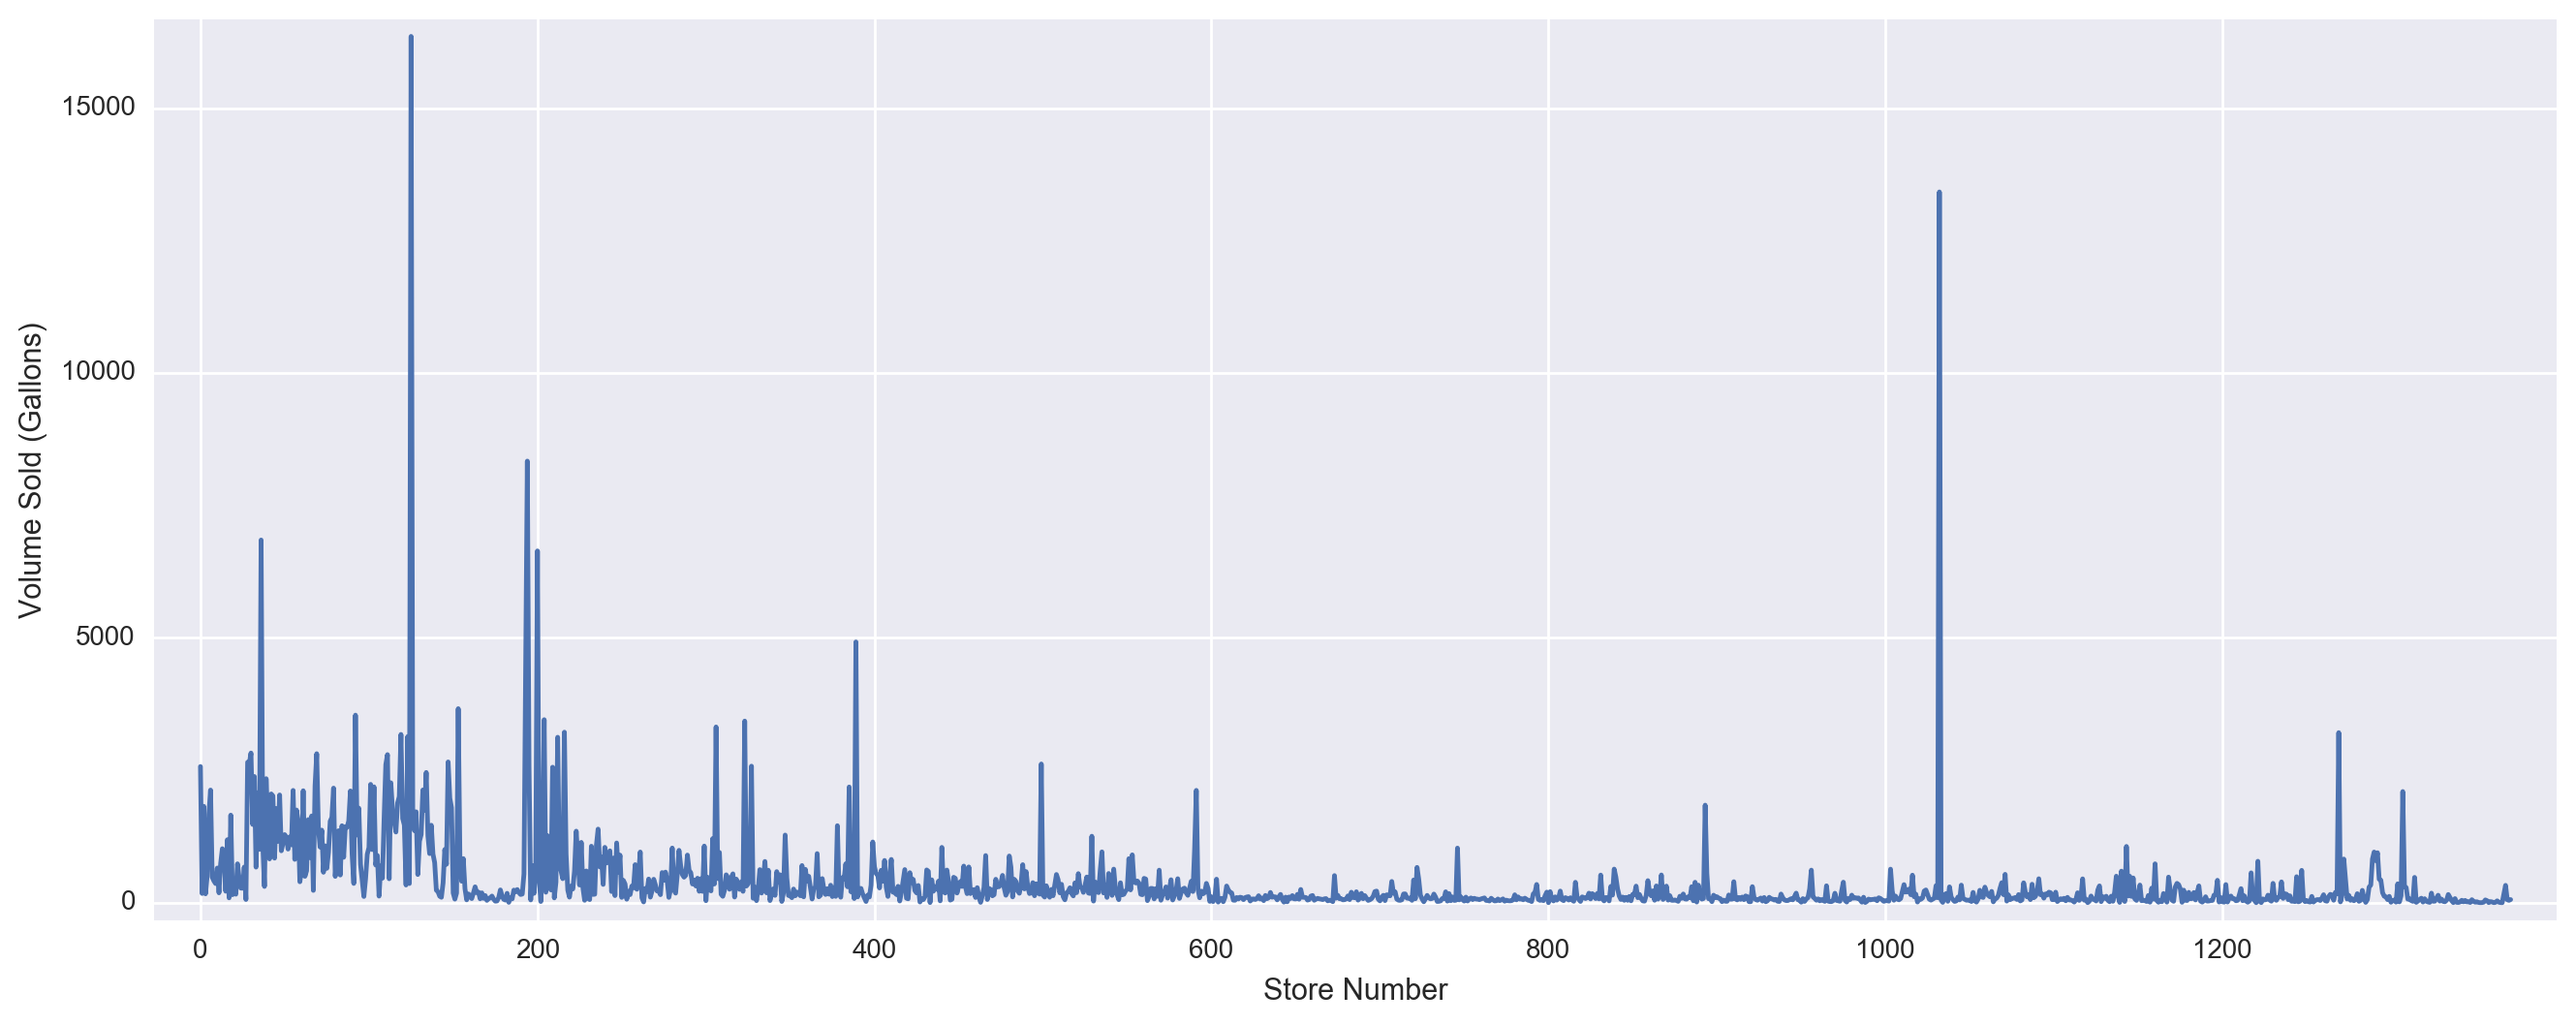

In [71]:
_ = plt.figure(figsize= (16,6))
_ = plt.plot(stores_gallons_2015.values);
_ = plt.xlabel("Store Number")
_ = plt.ylabel('Volume Sold (Gallons)')
plt.margins(0.02)
plt.show()

In [72]:
# highest stores selling gallons
for i, store in enumerate(stores_gallons_2015.keys()):
    if store == 4829:
        print i, store

1032 4829


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [73]:
iowa_clean_liquor = iowa_clean.copy()

In [74]:
iowa_clean_liquor['Liquor Category'] = ''

In [75]:
iowa_clean_liquor.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Liquor Category
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.50,6.75,12,81.00,9.0,2.38,
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750.0,13.75,20.63,2,41.26,1.5,0.40,


In [157]:
np.unique(iowa_clean_liquor['Category Name'].values)

array(['', '100 PROOF VODKA', 'AMARETTO - IMPORTED', 'AMERICAN ALCOHOL',
       'AMERICAN AMARETTO', 'AMERICAN COCKTAILS', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'AMERICAN SLOE GINS', 'ANISETTE',
       'APPLE SCHNAPPS', 'APRICOT BRANDIES', 'BARBADOS RUM',
       'BLACKBERRY BRANDIES', 'BLENDED WHISKIES',
       'BOTTLED IN BOND BOURBON', 'BUTTERSCOTCH SCHNAPPS',
       'CANADIAN WHISKIES', 'CHERRY BRANDIES', 'CINNAMON SCHNAPPS',
       'COFFEE LIQUEURS', 'CORN WHISKIES', 'CREAM LIQUEURS',
       'CREME DE ALMOND', 'DARK CREME DE CACAO',
       'DECANTERS & SPECIALTY PACKAGES', 'DISTILLED SPIRITS SPECIALTY',
       'FLAVORED GINS', 'FLAVORED RUM', 'GRAPE SCHNAPPS',
       'GREEN CREME DE MENTHE', 'HIGH PROOF BEER - AMERICAN',
       'IMPORTED AMARETTO', 'IMPORTED DRY GINS', 'IMPORTED GRAPE BRANDIES',
       'IMPORTED SCHNAPPS', 'IMPORTED VODKA', 'IMPORTED VODKA - MISC',
       'IRISH WHISKIES', 'JAMAICA RUM', 'JAPANESE WHISKY',
       'LOW PROOF VODKA', 'MISC. AMERICAN 

In [158]:
for i, licor in enumerate(iowa_clean_liquor['Category Name']):
    if 'VODKA' in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Vodka'
    elif "BRAND" in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Brandy'
    elif "GIN" in licor:    
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Gin'
    elif "RUM" in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Rum'
    elif "WHISK" in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Whiskey'
    elif "SCHNAPPS" in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Schnapps'
    elif "AMARETTO" in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Amaretto'
    elif "SCOTCH" in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Scotch'
    elif "TEQUILA" in licor:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Tequila'
    else:
        iowa_clean_liquor.ix[i, ['Liquor Category']] = 'Other'

In [159]:
iowa_clean_liquor.groupby(['Liquor Category', 'Category']).size()


Liquor Category  Category 
Amaretto         1081010.0     1346
                 1081015.0      274
                 1082010.0        3
                 1082015.0        2
Brandy           1051010.0     6589
                 1051100.0     1109
                 1051110.0     1580
                 1051120.0      330
                 1051140.0      678
                 1051150.0      144
                 1052010.0     4614
Gin              1041100.0     6559
                 1041150.0      250
                 1041200.0      169
                 1042100.0     2939
                 1062200.0    10062
Other                            68
                 1011400.0      190
                 1011700.0        3
                 1022200.0       63
                 1032100.0      114
                 1052100.0      224
                 1062400.0        8
                 1062500.0       38
                 1071100.0     6929
                 1081020.0       35
                 1081030.0     1914
 

In [160]:
iowa_clean_liquor

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Liquor Category
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.50,6.75,12,81.00,9.00,2.38,Brandy
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750.0,13.75,20.63,2,41.26,1.50,0.40,Whiskey
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000.0,12.59,18.89,24,453.36,24.00,6.34,Whiskey
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750.0,9.50,14.25,6,85.50,10.50,2.77,Other
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750.0,7.20,10.80,12,129.60,21.00,5.55,Vodka
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750.0,13.32,19.98,6,119.88,10.50,2.77,Gin
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750.0,6.66,9.99,3,29.97,2.25,0.59,Brandy
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750.0,15.75,23.63,2,47.26,3.50,0.92,Whiskey
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750.0,11.49,17.24,4,68.96,3.00,0.79,Vodka
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000.0,7.62,11.43,2,22.86,2.00,0.53,Schnapps


In [161]:
iowa_clean_liquor.groupby('Liquor Category').size()

Liquor Category
Amaretto     1625
Brandy      15044
Gin         19979
Other       30843
Rum         22691
Schnapps    14564
Scotch       2288
Tequila     12109
Vodka       69945
Whiskey     81867
dtype: int64

### 5.7 Do relationships exist between the broader liquor type and profit?

In [85]:
iowa_clean_2015_6_profit = iowa_clean.copy()
iowa_clean_2015_6_profit['Investment'] = iowa_clean[
    'State Bottle Cost'] * iowa_clean['Bottles Sold']
iowa_clean_2015_6_profit['Profit'] = iowa_clean[
    'Sale (Dollars)'] - iowa_clean_2015_6_profit['Investment']
iowa_clean_2015_6_profit['Liquor Category'] = iowa_clean_liquor['Liquor Category']


In [86]:
relation_liquor_profit = iowa_clean_2015_6_profit[['Liquor Category', 'Profit']].groupby(['Liquor Category']).sum()


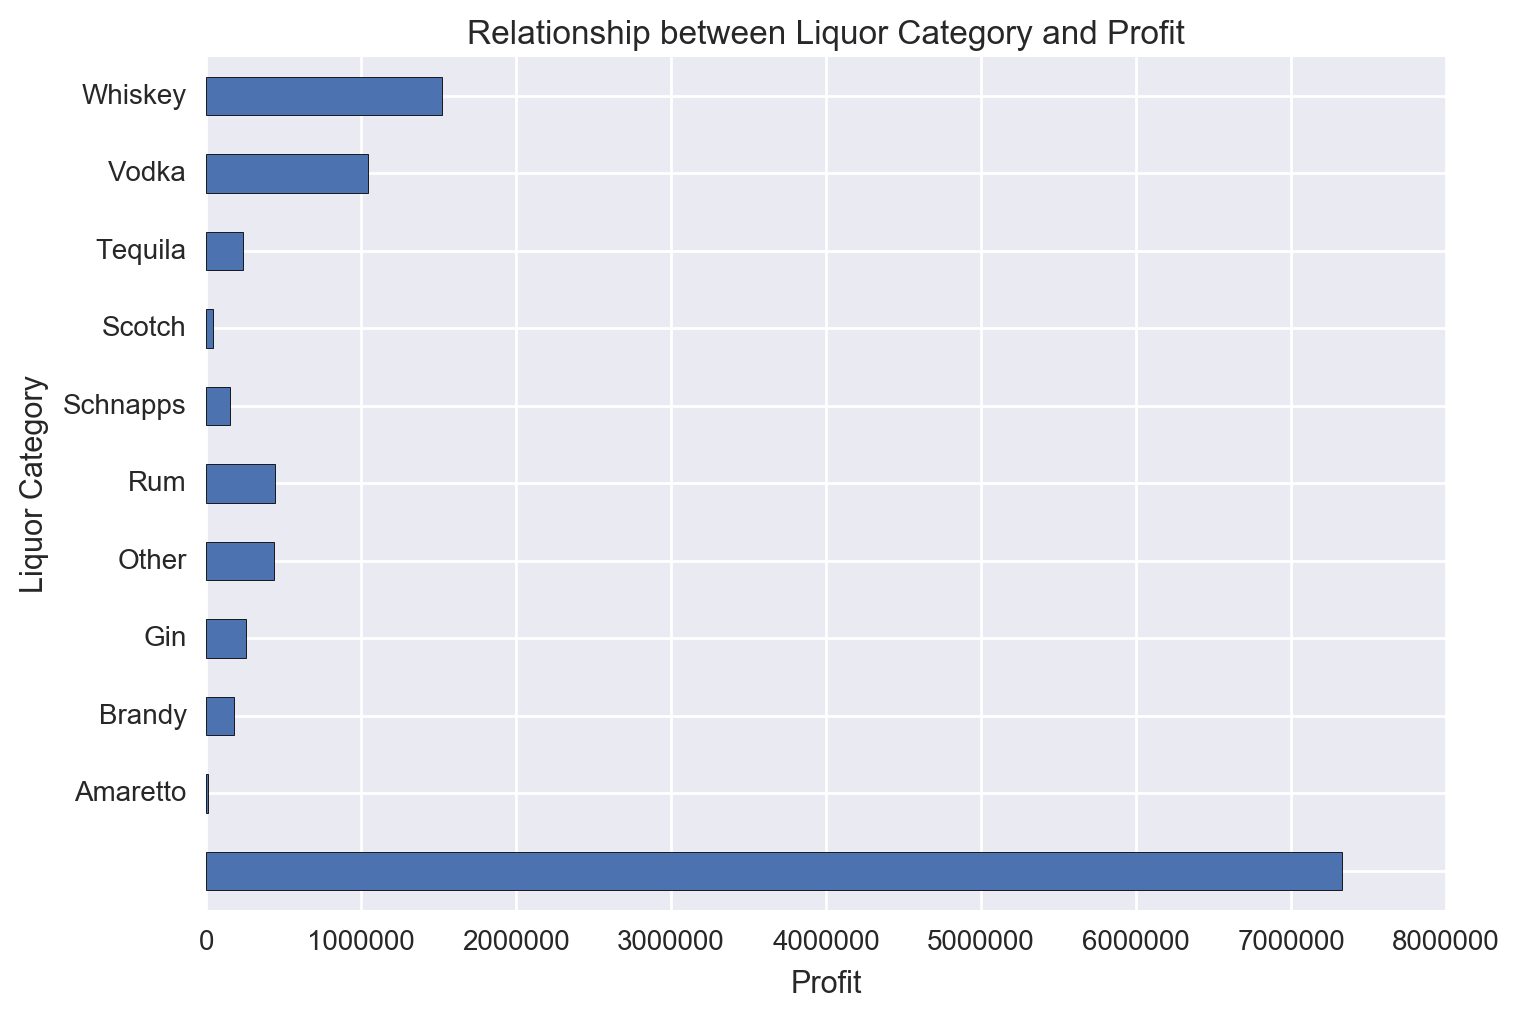

In [87]:
_ = relation_liquor_profit.plot(kind='barh', legend=False, title='Relationship between Liquor Category and Profit');
_ = plt.xlabel('Profit')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [88]:
iowa_clean_2015_6_profit.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Investment,Profit,Liquor Category
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750.0,4.50,6.75,12,81.00,9.0,2.38,54.0,27.00,Brandy
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750.0,13.75,20.63,2,41.26,1.5,0.40,27.5,13.76,Whiskey


In [89]:
relation_brand_sales = iowa_clean_2015_6_profit[['Category Name', 'Sale (Dollars)']].groupby(['Category Name']).sum()
# relation_brand_sales

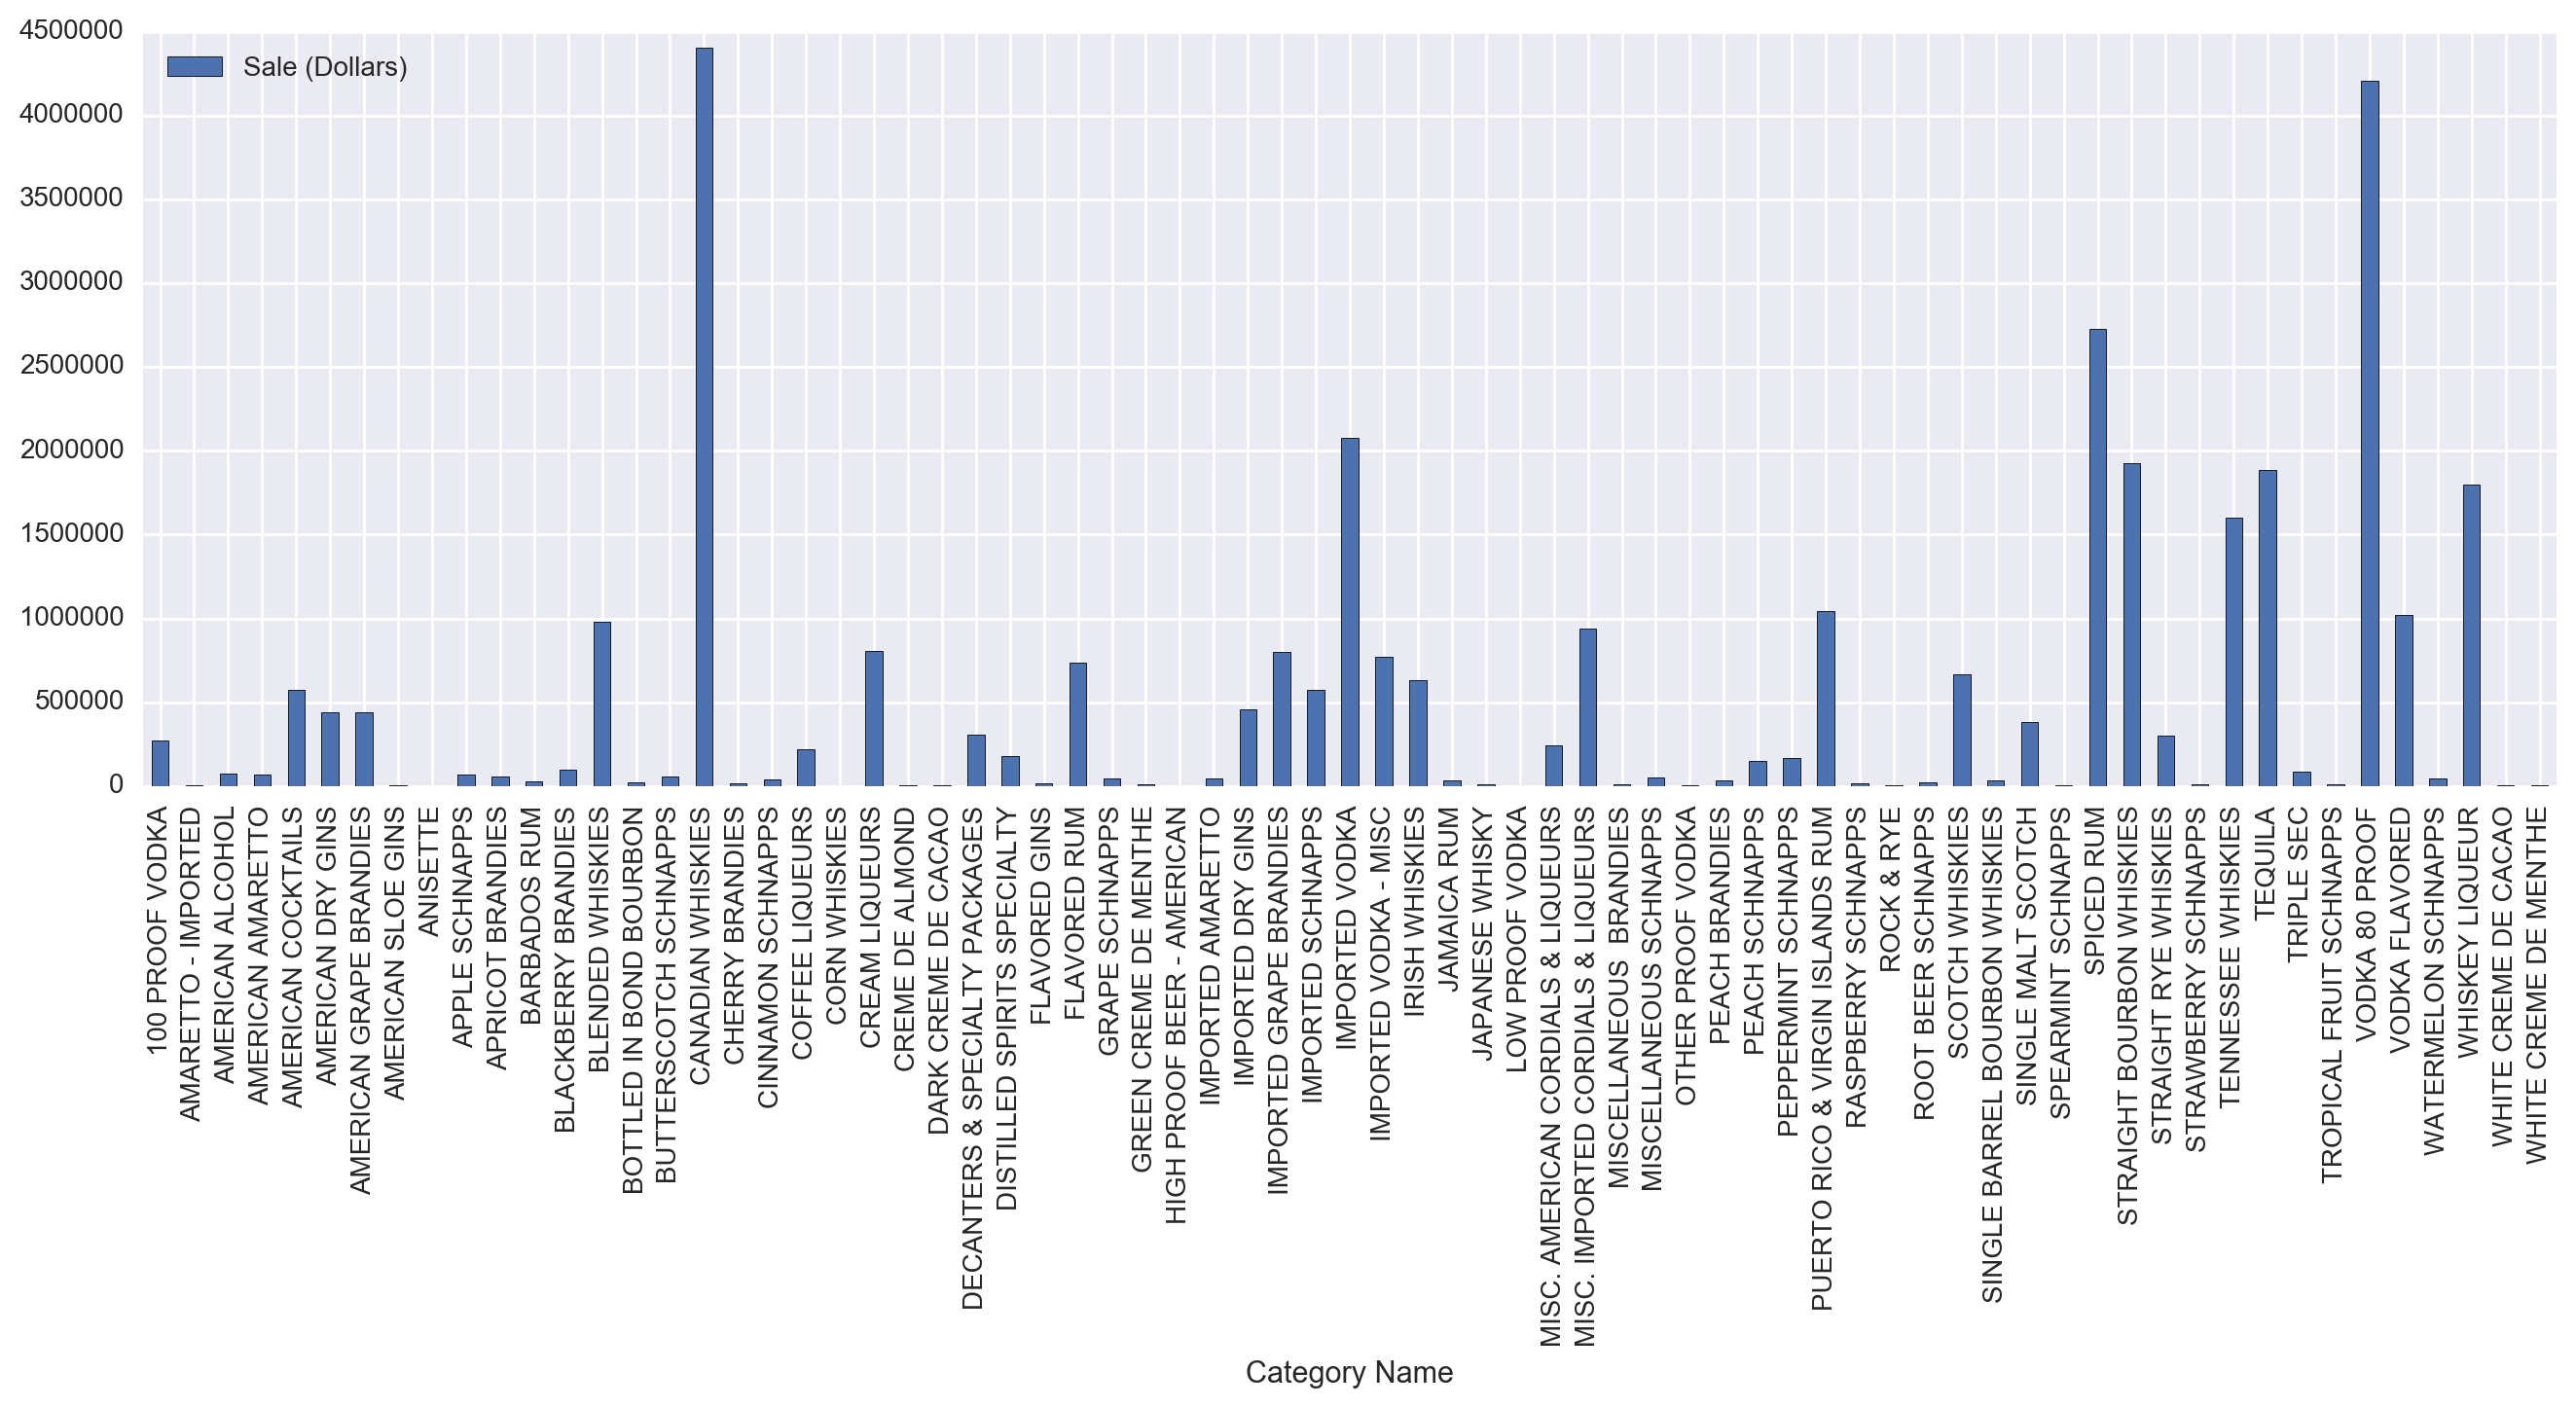

In [90]:
relation_brand_sales[1:].plot(kind='bar', figsize=(16,5));

In [91]:
relation_brand_profit = iowa_clean_2015_6_profit[['Category Name', 'Profit']].groupby(['Category Name']).sum()
# relation_brand_profit

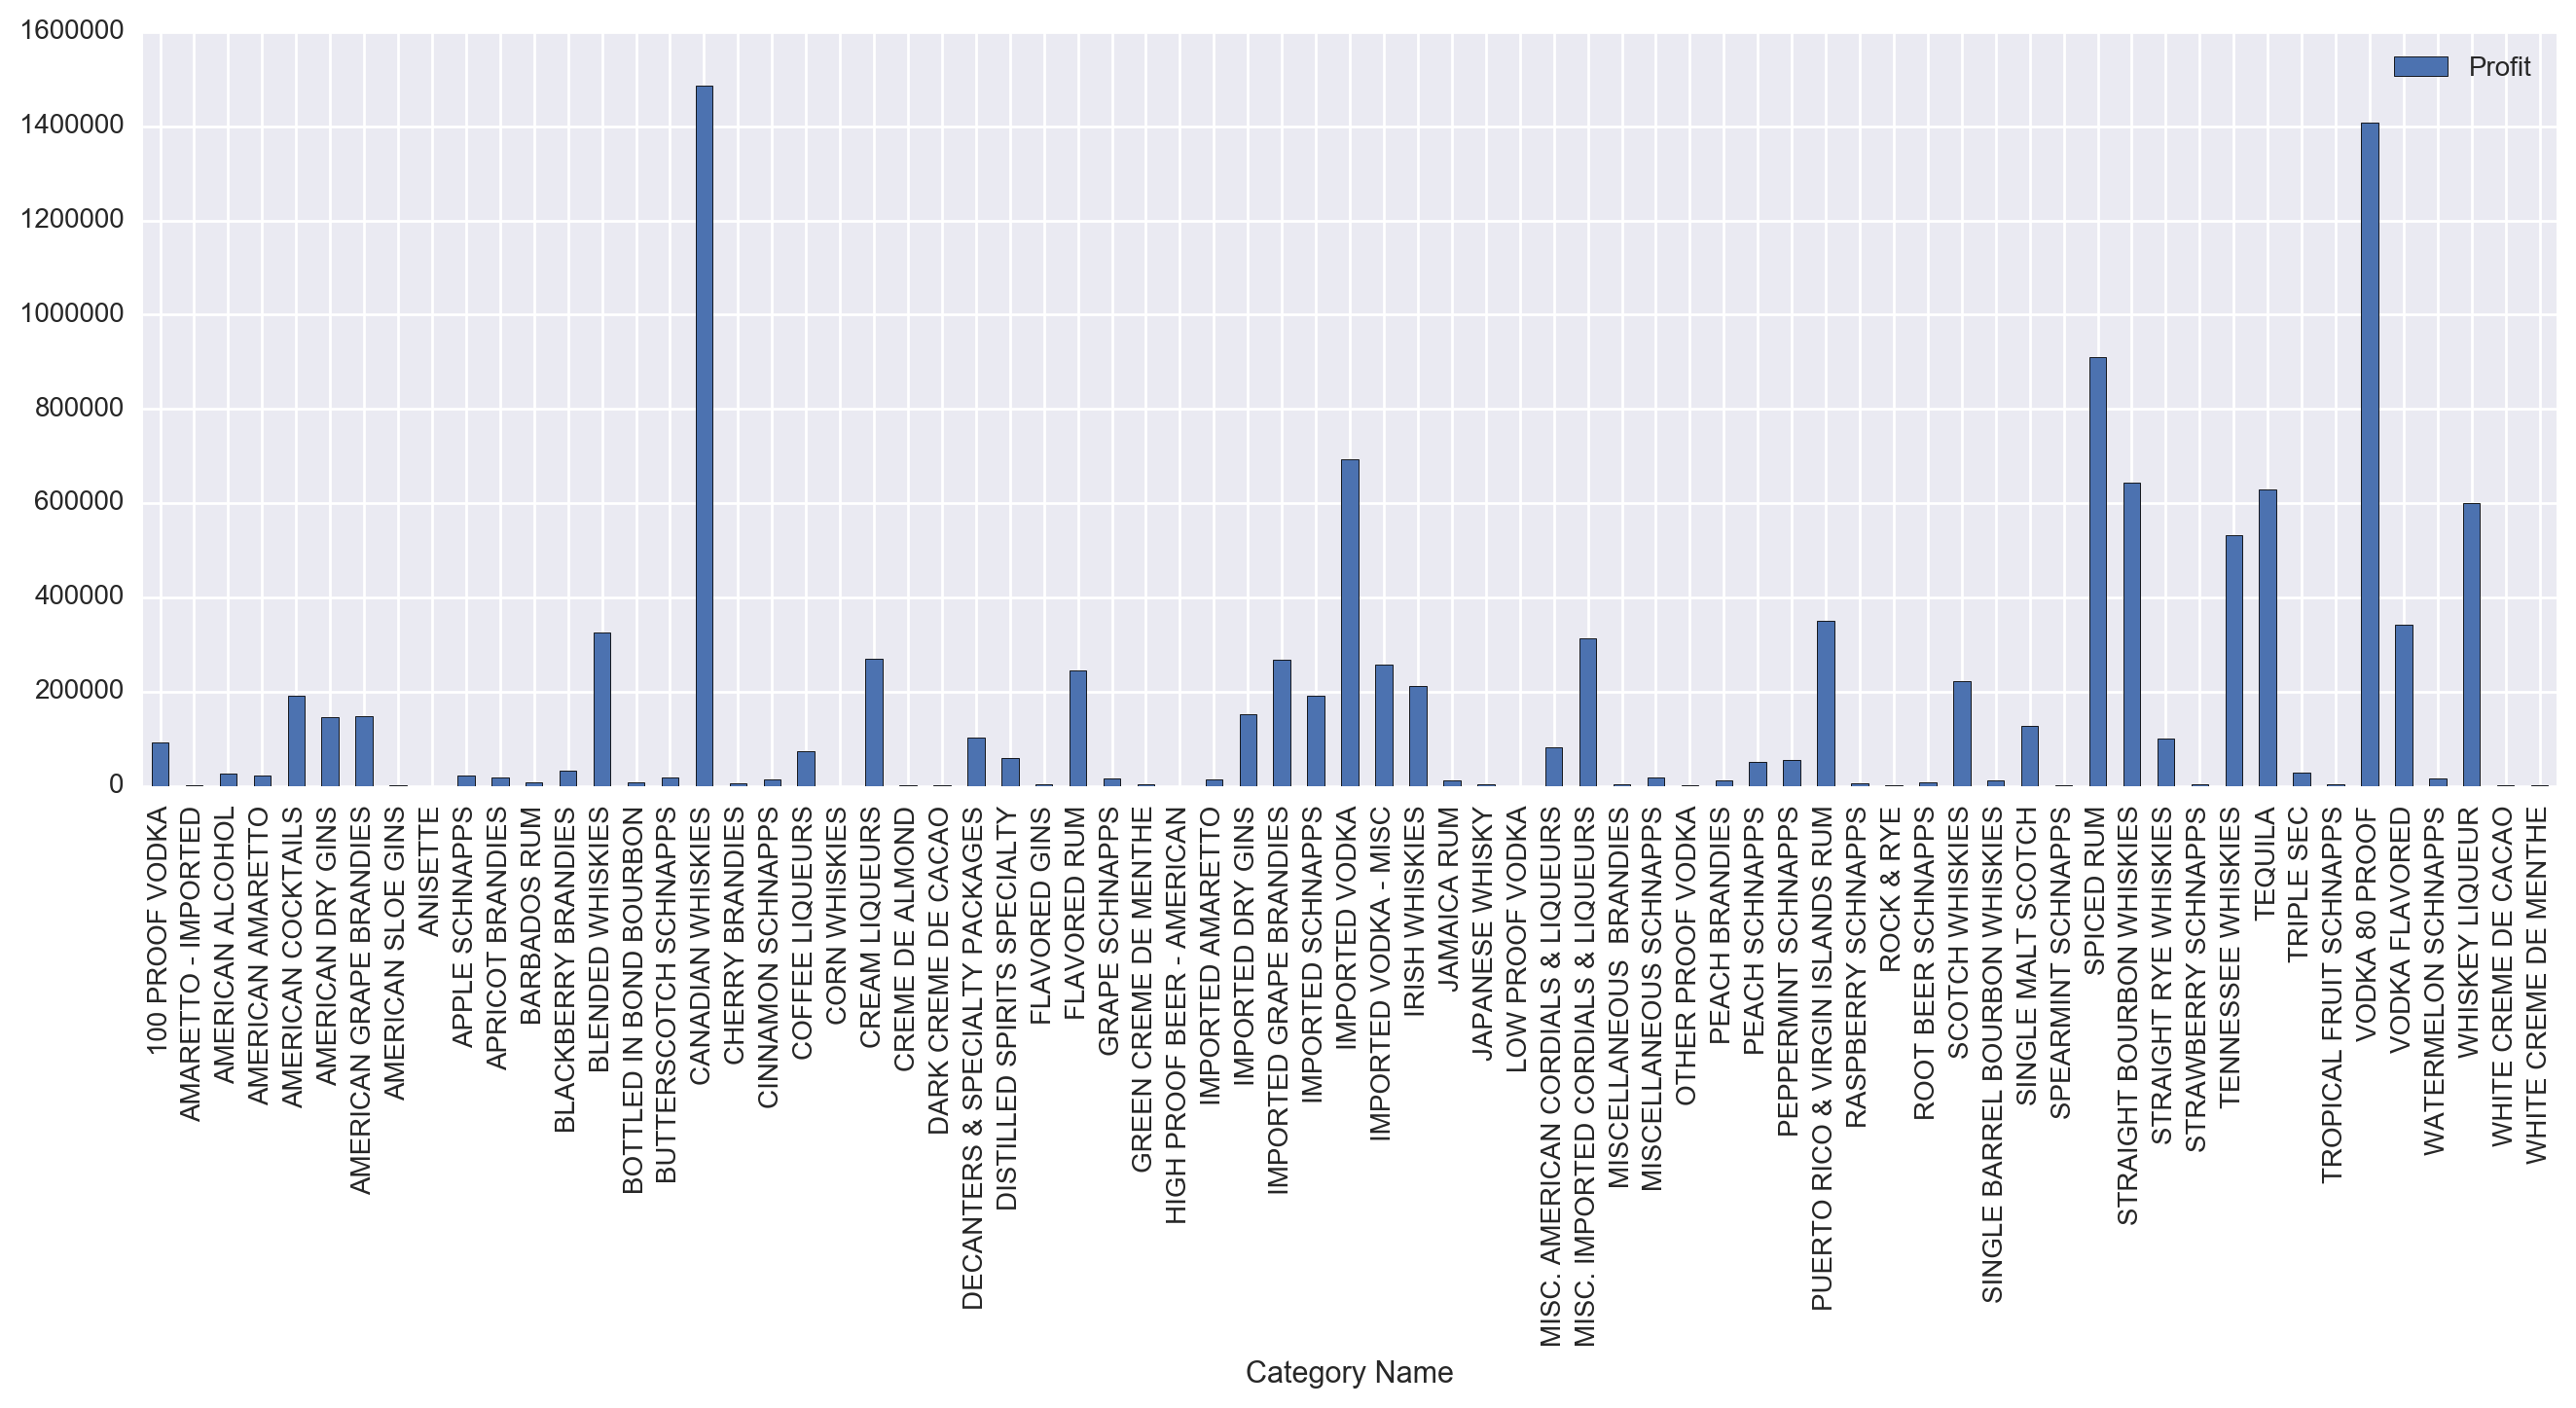

In [92]:
relation_brand_profit[1:].plot(kind='bar', figsize=(16,5));

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [93]:
iowa_clean.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750.0,13.75,20.63,2,41.26,1.5,0.40


In [94]:
print iowa_clean['Volume Sold (Gallons)'].max()
print iowa_clean['Volume Sold (Gallons)'].min()
print iowa_clean['Volume Sold (Gallons)'].mean()
print iowa_clean['Volume Sold (Gallons)'].median()

662.54
0.03
2.3728304331
1.39


In [95]:
iowa_clean['Volume Sold (Gallons)'].value_counts().sort

<bound method Series.sort of 2.38      53334
2.77      35960
0.40      24835
0.59      19761
0.20      17343
3.17      17253
0.79      13682
1.19      12087
0.26       6011
0.13       5681
5.55       5300
0.53       4894
0.92       4033
0.30       3780
4.76       3593
1.59       3591
0.16       3009
0.46       2950
6.34       2945
1.27       2187
0.32       2092
2.54       2078
0.10       1937
1.39       1937
1.06       1870
0.99       1646
8.32       1537
9.51       1393
0.50        999
0.21        974
          ...  
194.17        1
0.29          1
5.09          1
32.97         1
80.84         1
20.21         1
162.47        1
185.85        1
3.70          1
17.75         1
475.51        1
4.65          1
2.58          1
485.42        1
1.80          1
28.29         1
61.82         1
149.79        1
0.58          1
19.22         1
117.29        1
662.54        1
0.67          1
31.11         1
215.56        1
136.31        1
274.61        1
20.29         1
219.13        1
37.45      

In [96]:
iowa_clean[iowa_clean['Volume Sold (Gallons)']>2.7]['Volume Sold (Gallons)'].sort_values().count()

75077

In [97]:
# applied taxes to the stores that sold more than 2.7 Gallons

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [98]:
iowa_clean_2015.head(2)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.5,6.75,12,81.0,9.0,2.38
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750.0,7.2,10.80,12,129.6,21.0,5.55


In [99]:
iowa_clean_2015_q1 = iowa_clean_2015.copy()
print iowa_clean_2015_q1.shape
iowa_clean_2015_q1 = iowa_clean_2015_q1.reset_index()


(218477, 18)


In [100]:
iowa_clean_2016_q1 = iowa_clean_2016.copy()
print iowa_clean_2016_q1.shape
iowa_clean_2016_q1 = iowa_clean_2016_q1.reset_index()


(52361, 18)


In [101]:
iowa_clean_2015_q1['Q1'] = ''
iowa_clean_2016_q1['Q1'] = ''

In [102]:
for i, date in enumerate(iowa_clean_2015_q1['Date']):
    if int(date[:2]) > 0 and int(date[:2]) < 4: #and iowa_clean_2015_q1.ix[i, ['Date']] == str:
        iowa_clean_2015_q1.ix[i, ['Q1']] = 'Q1'


In [103]:
for i, date in enumerate(iowa_clean_2016_q1['Date']):
    if int(date[:2]) > 0 and int(date[:2]) < 4:
        iowa_clean_2016_q1.ix[i, ['Q1']] = 'Q1'

In [104]:
iowa_clean_2015_q1 = iowa_clean_2015_q1.copy()
iowa_clean_2015_q1.shape


(218477, 20)

In [105]:
iowa_clean_2016_q1 = iowa_clean_2016_q1.copy()
iowa_clean_2016_q1.shape


(52361, 20)

In [106]:
q1_county_sales_2015 = iowa_clean_2015_q1[iowa_clean_2015_q1['Q1'] == 'Q1'][['County', 'Store Number', 'Sale (Dollars)']]
q1_county_sales_2016 = iowa_clean_2016_q1[iowa_clean_2016_q1['Q1'] == 'Q1'][['County', 'Store Number', 'Sale (Dollars)']]

In [107]:
diff_q1_2015_2016 = q1_county_sales_2016.groupby(['County'])['Sale (Dollars)'].sum() - q1_county_sales_2015.groupby(['County'])['Sale (Dollars)'].sum()
diff_q1_2015_2016[diff_q1_2015_2016 > 0].sort_values(axis=0, ascending=False)

County
Johnson          49245.66
Polk             42771.51
Pottawattamie    34577.58
Woodbury         21814.83
Dallas           20248.59
Fayette          17206.69
Lee              16995.81
Crawford         16768.53
Cerro Gordo      14737.98
Black Hawk       12840.70
Cedar             9964.42
Sioux             9714.03
Marshall          8500.08
Cass              7327.83
Webster           6519.93
Marion            6501.35
Appanoose         6265.43
Scott             6139.46
Delaware          5838.17
Worth             5761.66
Hardin            5242.43
Ida               5223.10
Tama              4817.98
Allamakee         4198.31
Wapello           4073.61
Winneshiek        4025.11
Floyd             3987.78
Butler            3888.79
Clinton           3678.52
Union             3514.77
Plymouth          3418.52
Mills             2961.04
Lucas             2740.37
Muscatine         2612.69
Winnebago         2595.15
Dubuque           2589.73
Grundy            2121.09
Calhoun           2092.22
Adair

In [108]:
q1_county_sales_2015['Key'] = '2015'
q1_county_sales_2016['Key'] = '2016'

In [109]:
Q1_CS = pd.concat([q1_county_sales_2015, q1_county_sales_2016], keys=['2015', '2016'])
Q1_CS

County  Store Number  Sale (Dollars)   Key
2015 8            Scott          3858           13.38  2015
     12           Scott          2614           89.76  2015
     13            Linn          2590           42.76  2015
     14            Tama          3942           94.20  2015
     15           Sioux          3981          126.00  2015
     17       Dickinson          3390          644.40  2015
     21         Johnson          2545            7.35  2015
     23             Lee          2555           36.22  2015
     24          Warren          2549          129.60  2015
     25         Webster          2644          137.16  2015
     30      Black Hawk          3808          137.16  2015
     31            Linn          2514           32.88  2015
     37         Jackson          3612           23.76  2015
     40        Woodbury          2623           36.76  2015
     43           Floyd          2578           58.50  2015
     49             Lee          2191           30.00  2015
     56         Dubuque          4167           29.88  2015
     57      Black Hawk          2571           33.06  2015
     73           Adair          3461           72.96  2015
     76         Johnson          2513          161.28  2015
     84          Dallas          2665            7.05  2015
     88           Scott          4847           10.50  2015
     90            Polk          2648           47.25  2015
     91         Decatur          4419           27.72  2015
     93          Butler          4110           90.00  2015
     94      Des Moines          4898          110.64  2015
     95         Johnson          2512          810.00  2015
     96        Harrison          4307           25.50  2015
     114          Story          4129           17.25  2015
     117           Linn          3868          147.24  2015
...                 ...           ...             ...   ...
2016 52331  Cerro Gordo          2515          149.98  2016
     52332      Kossuth          3842          337.56  2016
     52333        Scott          4640           42.06  2016
     52334     Humboldt          2606            7.43  2016
     52335        Scott          4638          134.52  2016
     52336         Polk          2561           18.76  2016
     52337         Polk          3400          279.72  2016
     52338          Lee          2584          138.00  2016
     52339     Woodbury          3757          267.06  2016
     52340         Linn          2552          115.80  2016
     52341      Wapello          2611           19.32  2016
     52342     Woodbury          4588          311.52  2016
     52343      Kossuth          2585           29.34  2016
     52344     Woodbury          3986           81.60  2016
     52345       Bremer          2651           45.22  2016
     52346   Montgomery          2518           60.75  2016
     52347         Linn          4439           45.22  2016
     52348   Black Hawk          3663           67.14  2016
     52349         Polk          5127           73.80  2016
     52350       Wright          3056           28.52  2016
     52351         Polk          2626          123.00  2016
     52352         Polk          2620           15.75  2016
     52353     Cherokee          4310           58.92  2016
     52354         Linn          2529           37.50  2016
     52355     Marshall          2544           95.64  2016
     52356      Clinton          2806           14.10  2016
     52357      Johnson          3980          225.00  2016
     52358         Polk          5132           51.30  2016
     52359    Muscatine          5070           21.44  2016
     52360         Polk          2620           14.26  2016

[102120 rows x 4 columns]

In [110]:
Q1_CS_group = Q1_CS.groupby(['County', 'Key'])['County', 'Sale (Dollars)', 'Key']


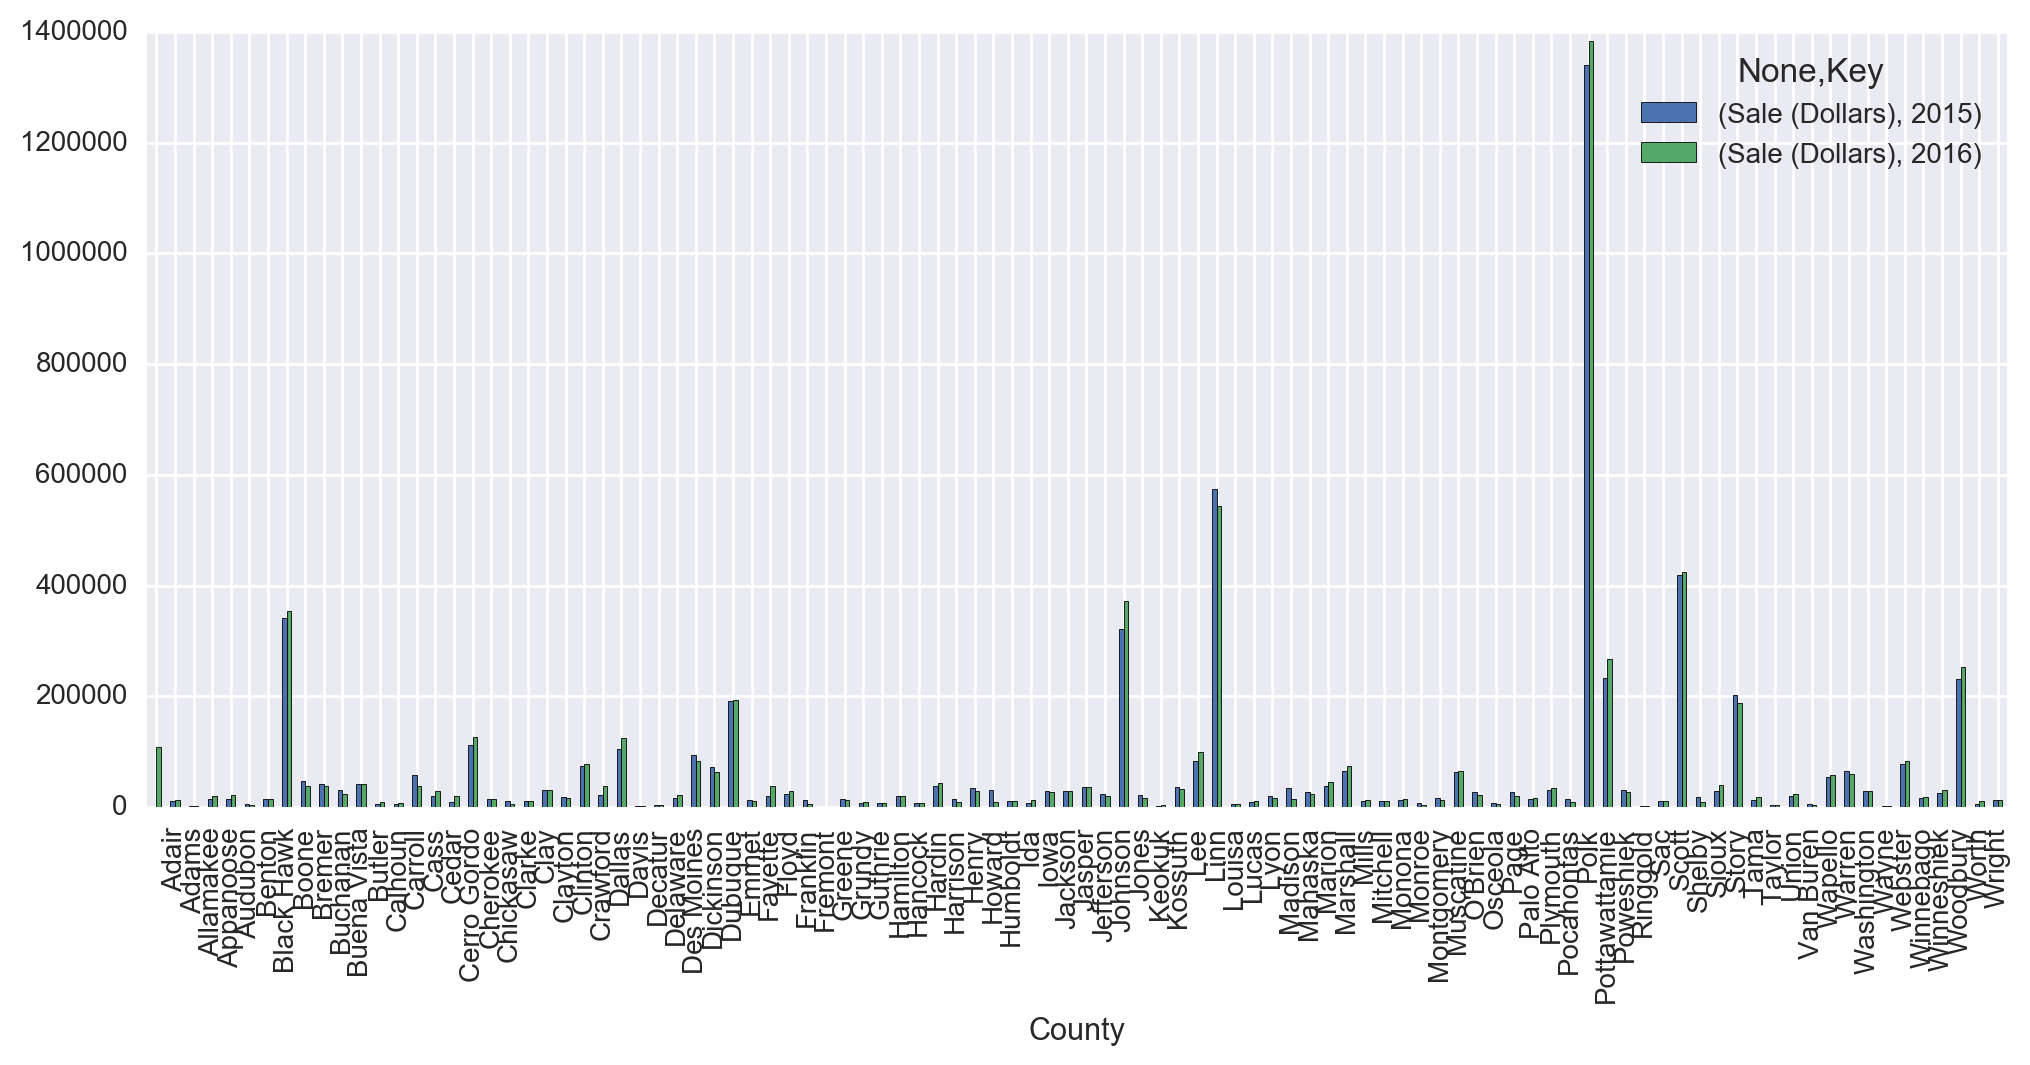

In [111]:
Q1_CS_group.sum().unstack('Key').plot(kind='bar', figsize=(12,5));

In [112]:
q1_one_2015 = q1_county_sales_2015[q1_county_sales_2015['County'] == 'Pottawattamie']
q1_one_2016 = q1_county_sales_2016[q1_county_sales_2016['County'] == 'Pottawattamie']

In [113]:
Q1_CS_one = pd.concat([q1_one_2015, q1_one_2016], keys=['2015', '2016'])
Q1_CS_one.groupby(['Store Number', 'Key']).sum()

Sale (Dollars)
Store Number Key                 
2445         2015         1215.08
             2016         1423.37
2613         2015        19945.52
             2016        27308.34
2629         2015        47432.72
             2016        34738.31
2641         2015         5310.34
             2016         5759.12
2845         2015         1007.46
             2016          536.88
3443         2015         6732.26
             2016         7672.15
3477         2015        16112.64
             2016        53213.22
3521         2015        22330.13
             2016         6033.58
3629         2015        10973.34
             2016        10636.44
3700         2015         7722.08
             2016         4780.20
3728         2015         6990.86
             2016        10666.58
3880         2015         3018.80
             2016         1909.46
3963         2015         4032.91
             2016         8990.36
4159         2015         1635.71
             2016        10578.24
4312         2015        31475.35
             2016        31699.03
...                           ...
4739         2016          618.60
4740         2015          469.68
             2016         2343.12
4741         2015          534.30
             2016          875.16
4742         2015         4452.48
             2016          249.12
4743         2015         6378.18
             2016         3691.45
4785         2015          935.58
             2016         2840.10
4808         2015         1155.66
             2016         2296.62
4866         2015         2444.94
             2016         2685.36
4867         2015         2205.12
             2016         2418.80
5035         2015          162.00
             2016          542.76
5044         2015          682.08
             2016          764.02
5077         2015         6004.26
             2016         9402.12
5078         2015          594.51
             2016           81.40
5095         2016          734.64
5164         2016         1770.77
5177         2016          325.50
5182         2016          232.18
5195         2016           92.50

[95 rows x 1 columns]

In [114]:
Q1_CS_one_group = Q1_CS_one.groupby(['Store Number', 'Key'])
Q1_CS_one_group.sum()

Sale (Dollars)
Store Number Key                 
2445         2015         1215.08
             2016         1423.37
2613         2015        19945.52
             2016        27308.34
2629         2015        47432.72
             2016        34738.31
2641         2015         5310.34
             2016         5759.12
2845         2015         1007.46
             2016          536.88
3443         2015         6732.26
             2016         7672.15
3477         2015        16112.64
             2016        53213.22
3521         2015        22330.13
             2016         6033.58
3629         2015        10973.34
             2016        10636.44
3700         2015         7722.08
             2016         4780.20
3728         2015         6990.86
             2016        10666.58
3880         2015         3018.80
             2016         1909.46
3963         2015         4032.91
             2016         8990.36
4159         2015         1635.71
             2016        10578.24
4312         2015        31475.35
             2016        31699.03
...                           ...
4739         2016          618.60
4740         2015          469.68
             2016         2343.12
4741         2015          534.30
             2016          875.16
4742         2015         4452.48
             2016          249.12
4743         2015         6378.18
             2016         3691.45
4785         2015          935.58
             2016         2840.10
4808         2015         1155.66
             2016         2296.62
4866         2015         2444.94
             2016         2685.36
4867         2015         2205.12
             2016         2418.80
5035         2015          162.00
             2016          542.76
5044         2015          682.08
             2016          764.02
5077         2015         6004.26
             2016         9402.12
5078         2015          594.51
             2016           81.40
5095         2016          734.64
5164         2016         1770.77
5177         2016          325.50
5182         2016          232.18
5195         2016           92.50

[95 rows x 1 columns]

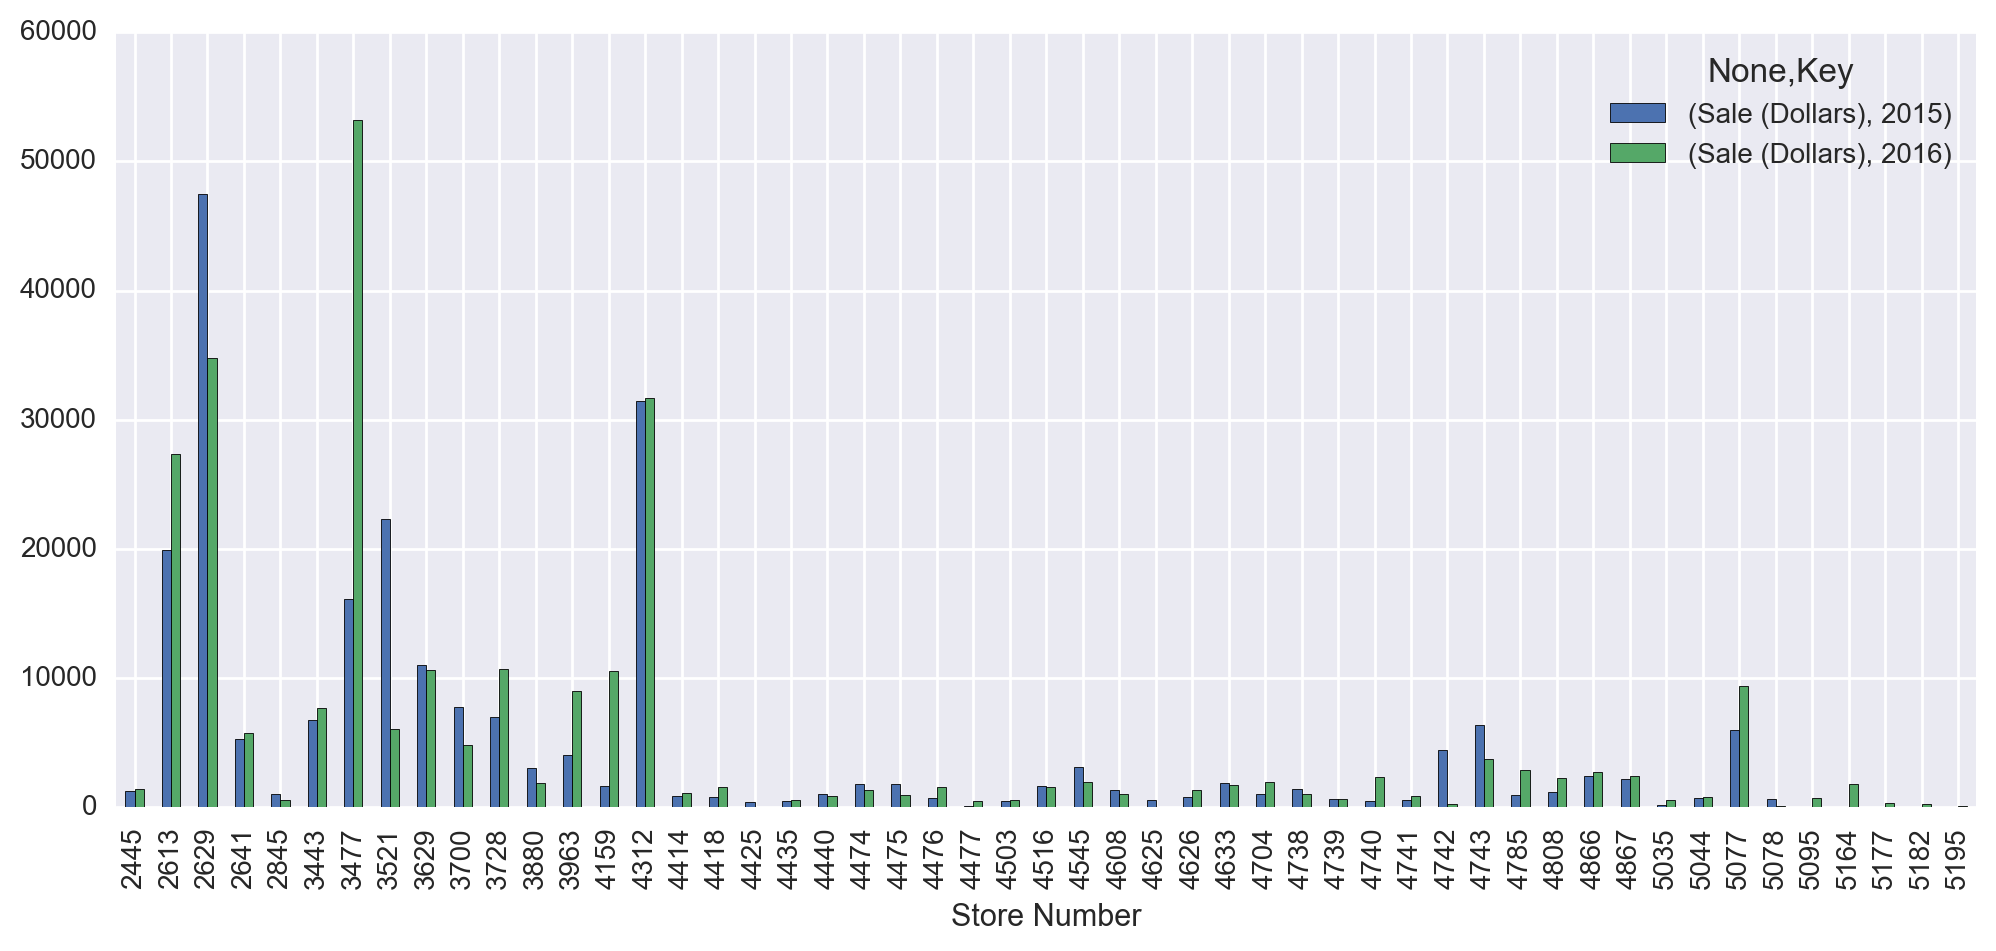

In [115]:
Q1_CS_one_group.sum().unstack('Key').plot(kind='bar', figsize=(12,5));

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [116]:
# my previous analysis doesnt show a store in two consecutives 
# years, so i dont have a proposal

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [117]:
diff_q1_2015_2016[diff_q1_2015_2016 > 0].sort_values(axis=0, ascending=False)


County
Johnson          49245.66
Polk             42771.51
Pottawattamie    34577.58
Woodbury         21814.83
Dallas           20248.59
Fayette          17206.69
Lee              16995.81
Crawford         16768.53
Cerro Gordo      14737.98
Black Hawk       12840.70
Cedar             9964.42
Sioux             9714.03
Marshall          8500.08
Cass              7327.83
Webster           6519.93
Marion            6501.35
Appanoose         6265.43
Scott             6139.46
Delaware          5838.17
Worth             5761.66
Hardin            5242.43
Ida               5223.10
Tama              4817.98
Allamakee         4198.31
Wapello           4073.61
Winneshiek        4025.11
Floyd             3987.78
Butler            3888.79
Clinton           3678.52
Union             3514.77
Plymouth          3418.52
Mills             2961.04
Lucas             2740.37
Muscatine         2612.69
Winnebago         2595.15
Dubuque           2589.73
Grundy            2121.09
Calhoun           2092.22
Adair

In [118]:
# My recommendation is to get a new store in Pottawattamie 
# since it made more in 2016 than 2015

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [119]:
# order of liquors that give more profit
iowa_clean[iowa_clean['County'] == 'Pottawattamie'].groupby(['Category Name'])['Sale (Dollars)'].sum().sort_values(axis=0, ascending=False)


Category Name
CANADIAN WHISKIES                     131173.20
VODKA 80 PROOF                        119806.63
TENNESSEE WHISKIES                    105675.20
SPICED RUM                            101956.86
WHISKEY LIQUEUR                        86006.24
STRAIGHT BOURBON WHISKIES              77836.09
IMPORTED VODKA                         74789.32
TEQUILA                                64740.01
MISC. IMPORTED CORDIALS & LIQUEURS     48133.10
BLENDED WHISKIES                       41575.34
VODKA FLAVORED                         35923.55
PUERTO RICO & VIRGIN ISLANDS RUM       35843.47
CREAM LIQUEURS                         31823.29
DECANTERS & SPECIALTY PACKAGES         30160.04
SCOTCH WHISKIES                        28277.01
AMERICAN COCKTAILS                     26321.84
FLAVORED RUM                           22950.33
IMPORTED SCHNAPPS                      22402.41
IRISH WHISKIES                         19161.38
IMPORTED VODKA - MISC                  18092.71
IMPORTED DRY GINS         

In [120]:
# Yes, it would change to Polk, but Polk was only selling in 2015
# not in 2016
iowa_clean[iowa_clean['Category Name'] == 'VODKA 80 PROOF'].groupby(['County'])['Sale (Dollars)'].sum().sort_values(axis=0, ascending=False)

County
Polk             958438.88
Linn             414028.21
Scott            292661.39
Johnson          247027.95
Black Hawk       203503.41
Dubuque          145485.13
Story            136444.51
Pottawattamie    119806.63
Woodbury         115259.75
Dallas           102649.59
Cerro Gordo       81889.25
Dickinson         60521.85
Des Moines        56986.17
Lee               56418.90
Clinton           56011.20
Webster           53633.50
Warren            48595.69
Muscatine         39220.72
Marshall          36368.38
Wapello           33274.14
Boone             30509.70
Marion            29786.01
Hardin            29596.10
Jasper            26412.68
Clay              25672.60
Iowa              24876.64
Carroll           24489.64
O'Brien           24315.58
Bremer            23436.98
Buena Vista       21658.21
                   ...    
Greene             7451.82
Sac                7449.74
Emmet              6901.15
Monona             6873.23
Montgomery         6695.84
Harrison           66

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [121]:
iowa_clean_mes = iowa_clean.copy()
iowa_clean_mes['Mes'] = ''

In [122]:
for i, date in enumerate(iowa_clean_mes['Date']):
    if date[:2] == '12':
        iowa_clean_mes.ix[i, ['Mes']] = '12'


In [123]:
# demember best seller
iowa_clean_mes[iowa_clean_mes['Mes'] == '12'].groupby(['Category Name'])['Sale (Dollars)'].sum().sort_values(ascending=False)

Category Name
CANADIAN WHISKIES                     361026.31
VODKA 80 PROOF                        333593.88
SPICED RUM                            245636.14
STRAIGHT BOURBON WHISKIES             182227.91
TENNESSEE WHISKIES                    164018.94
WHISKEY LIQUEUR                       161082.48
IMPORTED VODKA                        160610.98
TEQUILA                               148540.86
CREAM LIQUEURS                        132861.48
PUERTO RICO & VIRGIN ISLANDS RUM       82515.75
VODKA FLAVORED                         79053.47
SCOTCH WHISKIES                        73635.86
BLENDED WHISKIES                       73226.78
IMPORTED GRAPE BRANDIES                71728.39
MISC. IMPORTED CORDIALS & LIQUEURS     69921.17
DECANTERS & SPECIALTY PACKAGES         60351.40
IMPORTED VODKA - MISC                  58005.81
IMPORTED SCHNAPPS                      48219.88
FLAVORED RUM                           48099.51
AMERICAN GRAPE BRANDIES                46425.41
AMERICAN DRY GINS         

In [124]:
for i, date in enumerate(iowa_clean_mes['Date']):
    if date[:2] == '06' or date[:2] == '07' or date[:2] == '08':
        iowa_clean_mes.ix[i, ['Mes']] = 'Summer'

In [125]:
# Summer sells the following best sellers
iowa_clean_mes[iowa_clean_mes['Mes'] == 'Summer'].groupby(['Category Name'])['Sale (Dollars)'].sum().sort_values(ascending=False)

Category Name
VODKA 80 PROOF                        983994.71
CANADIAN WHISKIES                     814716.68
SPICED RUM                            491195.99
IMPORTED VODKA                        445048.25
TEQUILA                               428161.84
WHISKEY LIQUEUR                       365492.58
STRAIGHT BOURBON WHISKIES             362003.13
TENNESSEE WHISKIES                    275176.14
VODKA FLAVORED                        259953.33
PUERTO RICO & VIRGIN ISLANDS RUM      226620.45
MISC. IMPORTED CORDIALS & LIQUEURS    212918.79
BLENDED WHISKIES                      200471.12
FLAVORED RUM                          174144.30
IMPORTED VODKA - MISC                 164977.31
IMPORTED GRAPE BRANDIES               164210.64
AMERICAN COCKTAILS                    139238.22
CREAM LIQUEURS                        119521.46
SCOTCH WHISKIES                       118780.97
IMPORTED DRY GINS                     114812.48
IMPORTED SCHNAPPS                     106254.71
AMERICAN DRY GINS         

In [126]:
for i, date in enumerate(iowa_clean_mes['Date']):
    if date[:2] == '09':
        iowa_clean_mes.ix[i, ['Mes']] = 'Mexico'

In [127]:
# People drink more Vodka in September, Mexico's independence Month
iowa_clean_mes[iowa_clean_mes['Mes'] == 'Mexico'].groupby(['Category Name'])['Sale (Dollars)'].sum().sort_values(ascending=False)

Category Name
VODKA 80 PROOF                        318621.67
CANADIAN WHISKIES                     282684.20
SPICED RUM                            212746.31
IMPORTED VODKA                        159600.46
WHISKEY LIQUEUR                       136027.33
STRAIGHT BOURBON WHISKIES             134058.57
TEQUILA                               123790.66
TENNESSEE WHISKIES                    119297.62
PUERTO RICO & VIRGIN ISLANDS RUM       77893.76
BLENDED WHISKIES                       65598.54
VODKA FLAVORED                         64697.73
IMPORTED GRAPE BRANDIES                57741.08
MISC. IMPORTED CORDIALS & LIQUEURS     57068.95
FLAVORED RUM                           55189.16
IMPORTED VODKA - MISC                  49581.36
CREAM LIQUEURS                         47328.04
IMPORTED SCHNAPPS                      42118.11
SCOTCH WHISKIES                        40723.72
IRISH WHISKIES                         37284.91
AMERICAN GRAPE BRANDIES                30638.77
IMPORTED DRY GINS         

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

In [128]:
fechas_2015 = []
fechas_2016 = []
for date in iowa_clean_2015['Date'].values:
    fechas_2015.append(date)
for date in iowa_clean_2016['Date'].values:
    fechas_2016.append(date)


In [129]:
print sorted(fechas_2015)[0], sorted(fechas_2015)[-1]
print sorted(fechas_2016)[0], sorted(fechas_2016)[-1]
periodo = 12 + int(sorted(fechas_2016)[-1][:2])
periodo

01/05/2015 12/31/2015
01/04/2016 03/31/2016


15

In [130]:
liquor_total = iowa_clean.groupby(['Category Name'])['Sale (Dollars)'].sum().sort_values(axis=0, ascending=False)[0]
print liquor_total
iowa_clean.groupby(['Category Name'])['Sale (Dollars)'].sum().sort_values(axis=0, ascending=False)


4408768.86


Category Name
CANADIAN WHISKIES                     4408768.86
VODKA 80 PROOF                        4208811.41
SPICED RUM                            2727704.47
IMPORTED VODKA                        2079010.43
STRAIGHT BOURBON WHISKIES             1923907.85
TEQUILA                               1886724.18
WHISKEY LIQUEUR                       1797053.44
TENNESSEE WHISKIES                    1598605.37
PUERTO RICO & VIRGIN ISLANDS RUM      1046370.81
VODKA FLAVORED                        1020099.57
BLENDED WHISKIES                       978413.11
MISC. IMPORTED CORDIALS & LIQUEURS     941341.80
CREAM LIQUEURS                         807711.58
IMPORTED GRAPE BRANDIES                802629.55
IMPORTED VODKA - MISC                  773922.38
FLAVORED RUM                           736705.93
SCOTCH WHISKIES                        667083.25
IRISH WHISKIES                         634205.85
IMPORTED SCHNAPPS                      572982.81
AMERICAN COCKTAILS                     571592.95
IMPORT

In [131]:
iowa_clean.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750.0,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750.0,13.75,20.63,2,41.26,1.5,0.40


In [147]:
# average cost of a bottle of 750 ml
promedio_cost = iowa_clean[(iowa_clean['Category Name'] == 'CANADIAN WHISKIES') & 
                           (iowa_clean['County'] == 'Polk') &
                           (iowa_clean['Bottle Volume (ml)'] == 750.0)]['State Bottle Cost'].mean()
promedio_cost

9.812112956810543

In [149]:
# us gallons to ml
gals_ml = 20000 * 3785.412
bottle_750 = round((gals_ml / 750), 2)
# the total of dollars to buy 20000 US gallons
bottle_750 *= promedio_cost
bottle_750

990477.0701884297

In [150]:
# liquor and property investment
investment = round((150000 + bottle_750), 2)
investment

1140477.07

In [151]:
# number of months to payback the investment
round((investment / liquor_total), 2)

0.26

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?

In [152]:
print investment, liquor_total

1140477.07 4408768.86


In [153]:
liquor_total_tri = round((liquor_total / float(15)) * (3), 2)
liquor_total_tri

881753.77

In [154]:
bankruptcy = True
interest = 5
while bankruptcy == True:
    balance = investment
    contador = 0
    while balance > 0:
        contador += 1
        balance += balance*interest
        balance -= liquor_total_tri
        if balance > investment:
#             print 'Bankruptcy'
            bankruptcy = False
            break
#     print 'Manuel'
    if bankruptcy == False:
#         print 'ok'
        bankruptcy = True
        interest -= 0.01
        continue
    break
if balance < 0:
    print 'It was paid in ' + str(contador/4) + ' years'
    print 'Interest rate of: ', interest

It was paid in 2 years
Interest rate of:  0.77


In [156]:
# it would take a loan for 2 years to be paid 